In [33]:
import ssl
from termcolor import colored
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
from matplotlib import pyplot as plt
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url,names=['Target','Alcohol','Malic acid','Ash','Alcalinity of Ash','Magnesium','Total phenols',
                              'Flavanoids','Nonflavanoid Phenols','Proanthocyanins','Colour Intensity',
                              'Hue','OD280/OD315 of diluted wines','Proline'])
df_wine.head()


,Target,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Histogram (for each individually)

Text(0.5, 0, 'Total Pehnols')

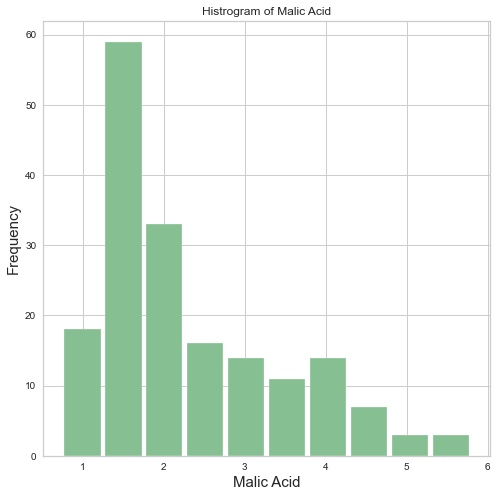

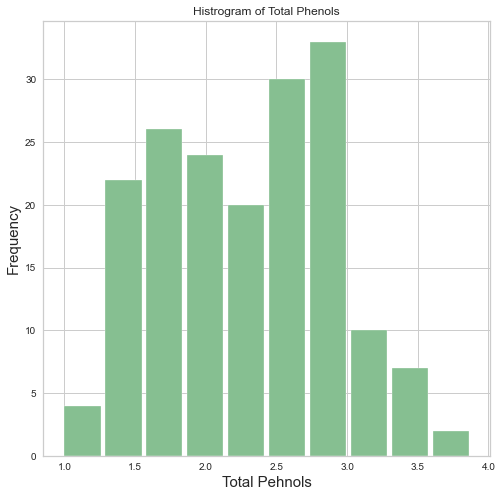

In [34]:
# using pandas dataframse Histogram method
df_wine.hist(column="Malic acid", figsize=(8,8), color='#86bf91', rwidth=0.9)
plot.title("Histrogram of Malic Acid")
plot.ylabel("Frequency", fontsize=15)
plot.xlabel("Malic Acid", fontsize=15)
df_wine.hist(column="Total phenols", figsize=(8,8), color='#86bf91', rwidth=0.9)
plot.title("Histrogram of Total Phenols")
plot.ylabel("Frequency", fontsize=15)
plot.xlabel("Total Pehnols", fontsize=15)

### Box plot (of each feature individually)

Text(0.5, 1.0, 'Box plot of Malic acid and Total Phenols')

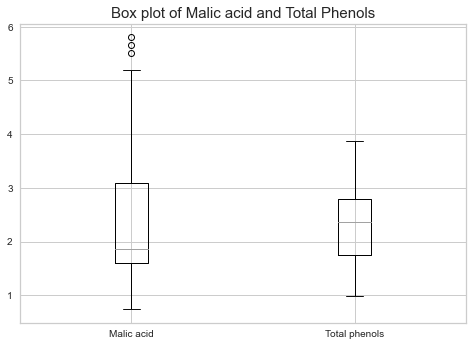

In [35]:
# Q1- box plot
df_wine.boxplot(column=['Malic acid','Total phenols'])
plot.title("Box plot of Malic acid and Total Phenols",fontsize=15)

### Pairplot (of the two features)

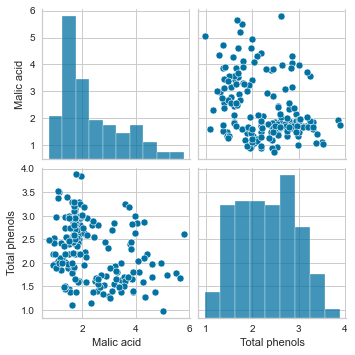

In [36]:
import seaborn as sns
df = pd.DataFrame()
df['Malic acid'] = df_wine['Malic acid']
df['Total phenols'] = df_wine['Total phenols']
sns.pairplot(df)

## Standardizing Dataframe

In [37]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_standardized = pd.DataFrame(ss.fit_transform(df_wine),columns = df_wine.columns)

Text(0.5, 0, 'Total Phenols')

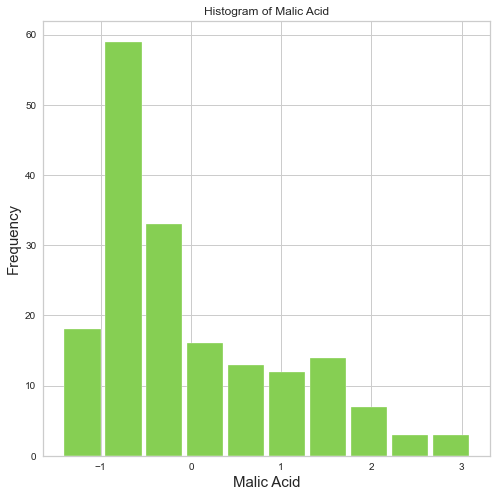

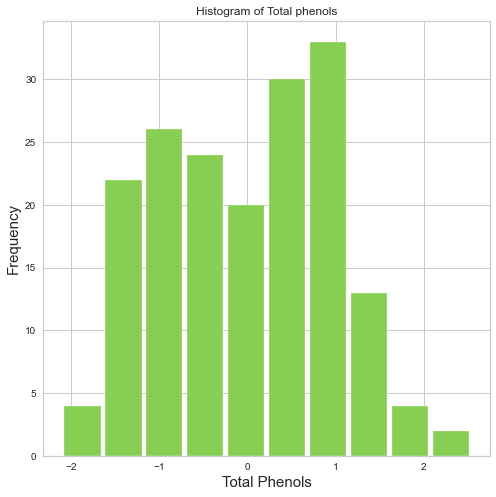

In [38]:
# using pandas dataframse Histogram method
df_standardized.hist(column="Malic acid", figsize=(8,8), color='#86cf53', rwidth=0.9)
plot.title("Histogram of Malic Acid")
plot.ylabel("Frequency", fontsize=15)
plot.xlabel("Malic Acid", fontsize=15)
df_standardized.hist(column="Total phenols", figsize=(8,8), color='#86cf53', rwidth=0.9)
plot.title("Histogram of Total phenols")
plot.ylabel("Frequency", fontsize=15)
plot.xlabel("Total Phenols", fontsize=15)

<AxesSubplot:>

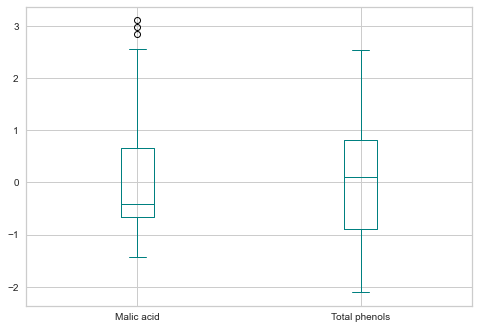

In [39]:
df_standardized.boxplot(column=['Malic acid','Total phenols'],color='#008080')

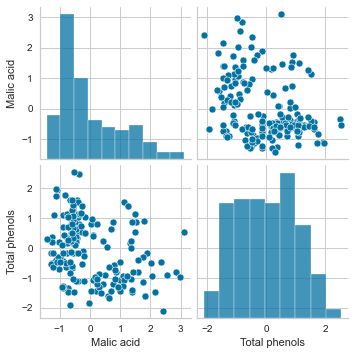

In [40]:
import seaborn as sns
df = pd.DataFrame()
df['Malic acid'] = df_standardized['Malic acid']
df['Total phenols'] = df_standardized['Total phenols']
sns.pairplot(df)

### Draw a histogram for all the attribute values across all attributes (of the original (non-standardized) data) to see the wide range of values you are dealing with

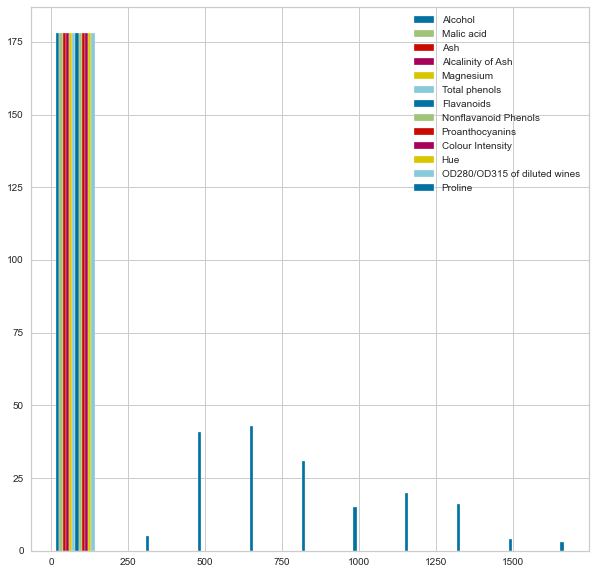

In [41]:
%matplotlib inline
plot.figure(figsize=[10,10])

plot.hist([df_wine['Alcohol'],df_wine['Malic acid'],df_wine['Ash'],df_wine['Alcalinity of Ash'],
          df_wine['Magnesium'],df_wine['Total phenols'],df_wine['Flavanoids'],df_wine['Nonflavanoid Phenols'],
          df_wine['Proanthocyanins'],df_wine['Colour Intensity'],df_wine['Hue'],df_wine['OD280/OD315 of diluted wines'],df_wine['Proline']])
plot.legend(df_wine.columns[1:])
x = np.random.normal(1, 2, 5000)


## Part2

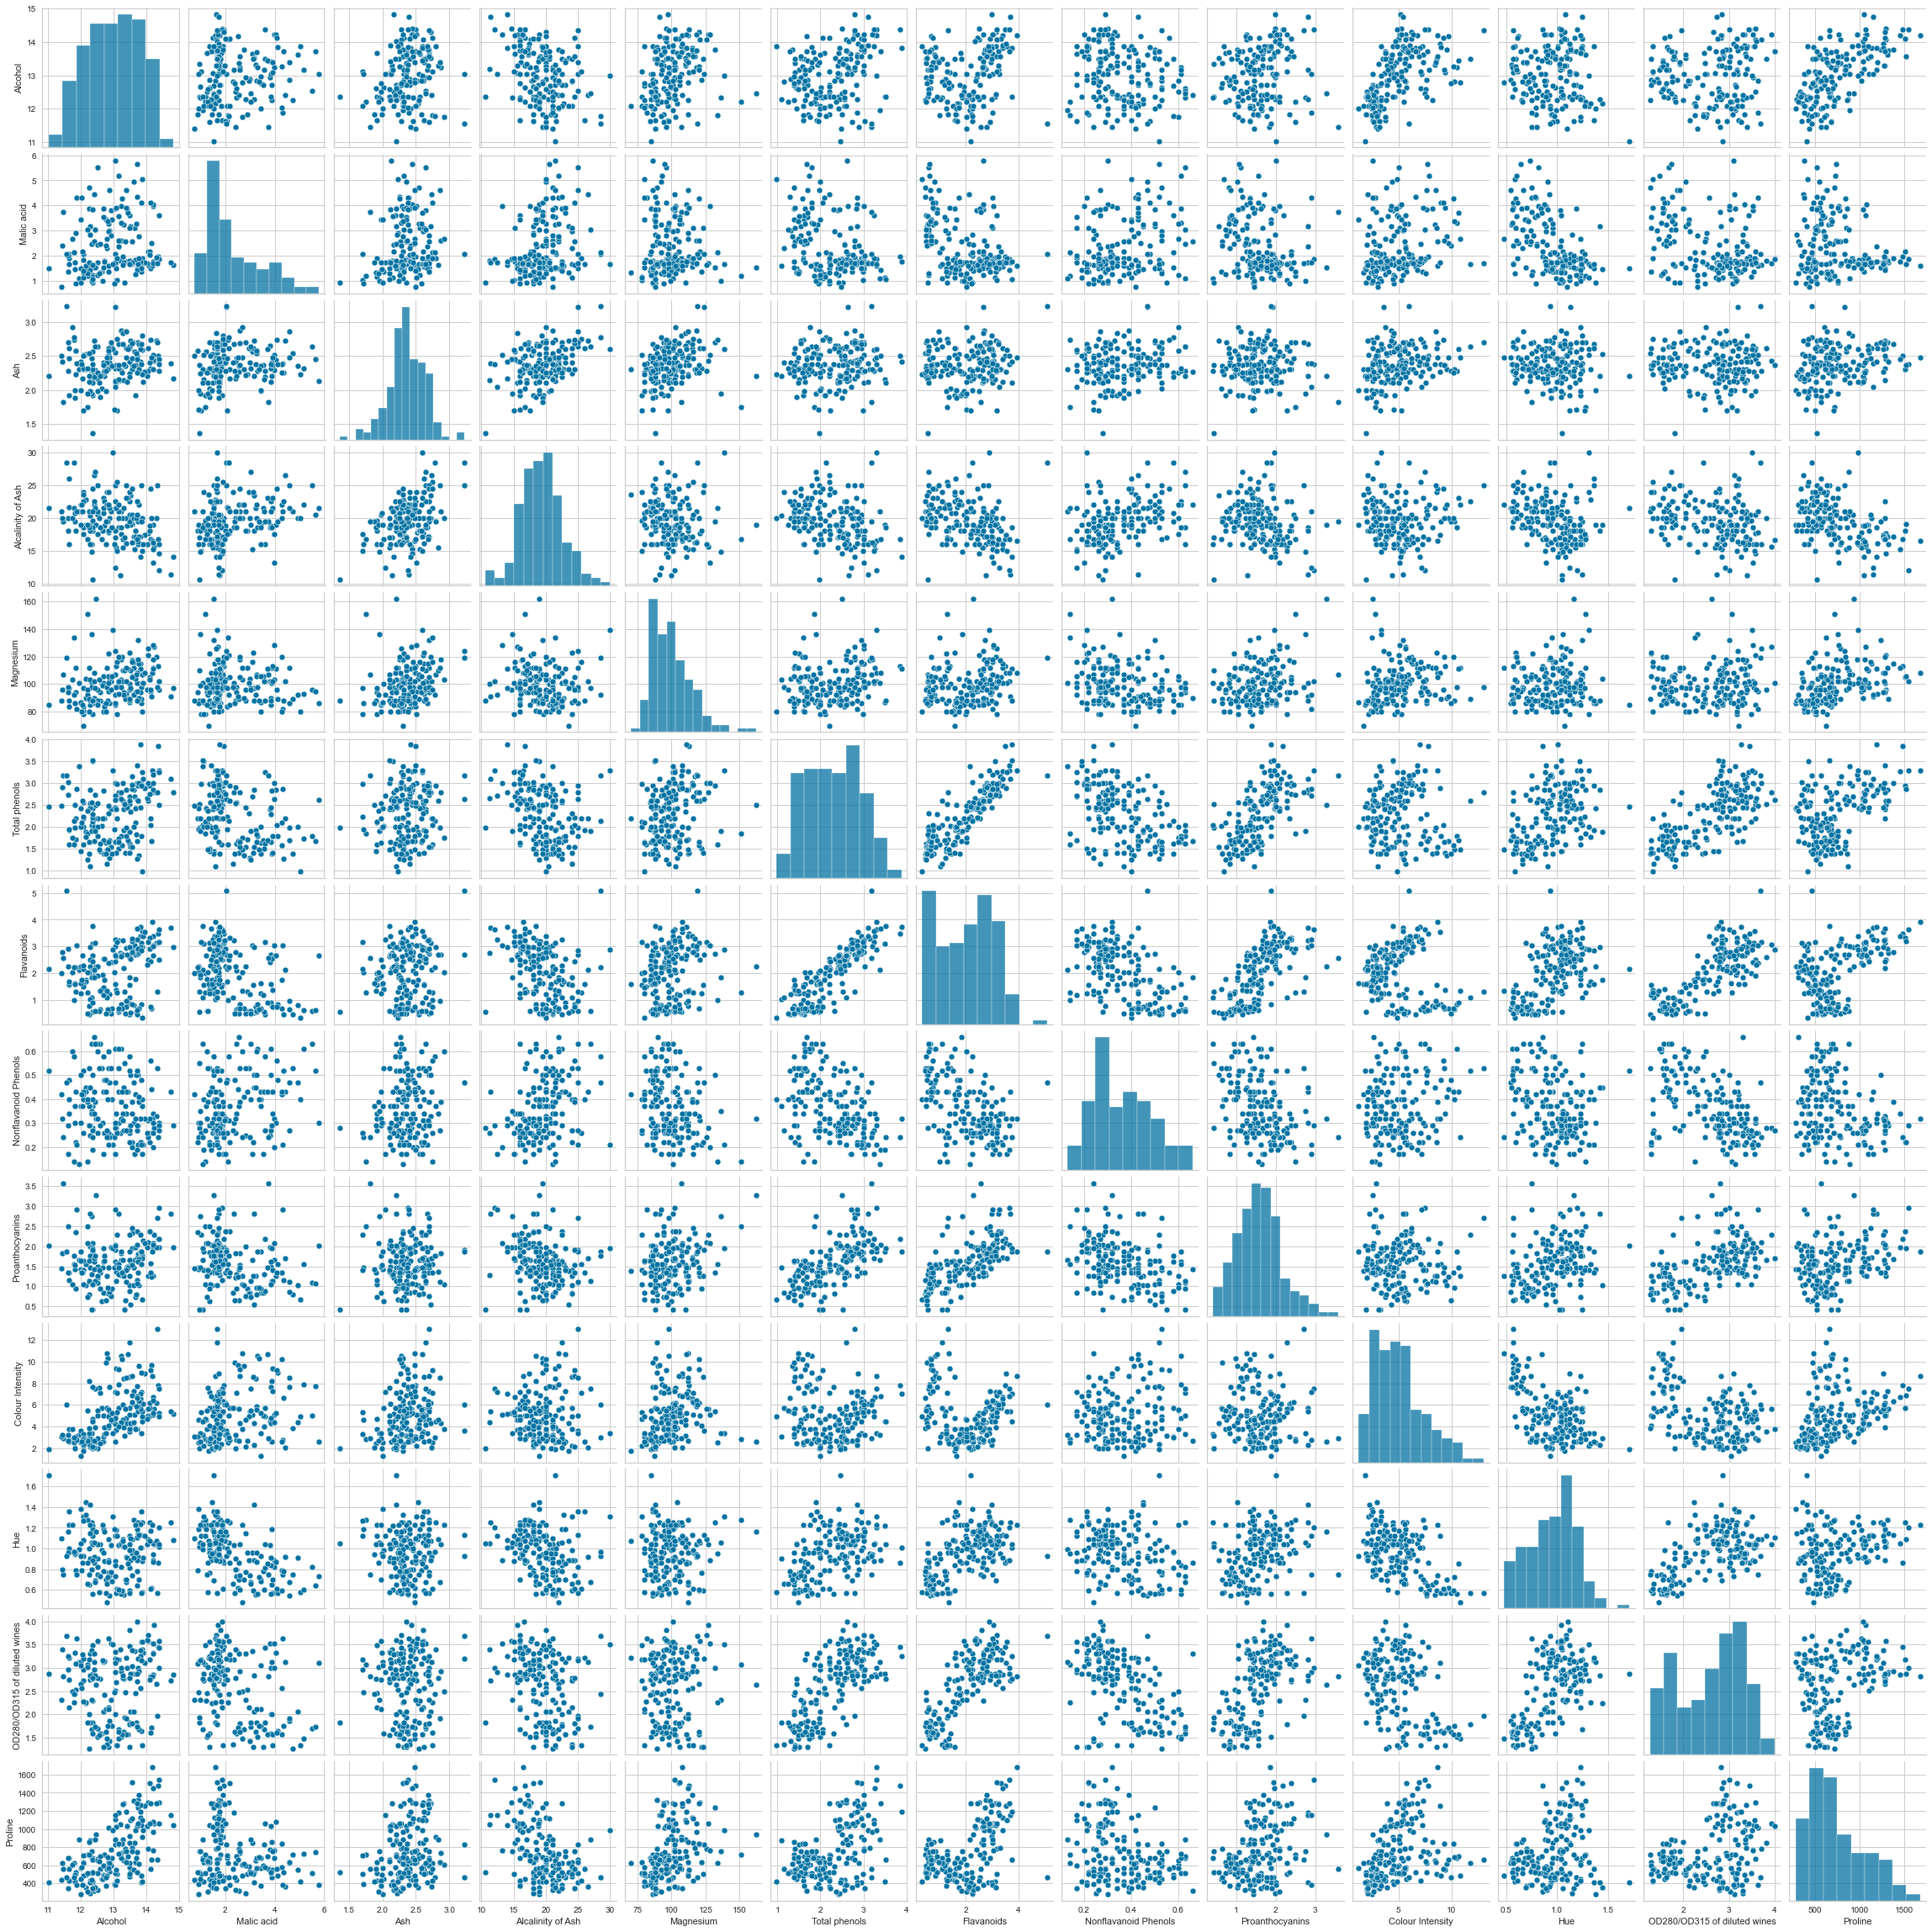

In [42]:
import seaborn as sns
sns.pairplot(df_wine.drop(columns='Target'))

### Select 2 attributes that look like they have a good linear relationship and Plot the data along with the linear regression lin

<AxesSubplot:xlabel='Flavanoids', ylabel='Total phenols'>

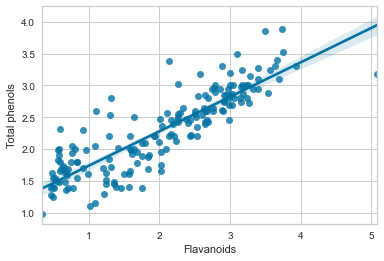

In [43]:
sns.set_style('whitegrid') 
sns.regplot(x ='Flavanoids', y ='Total phenols', data = df_wine)

### Inspect the r2 value & y intercept using target column as label

In [44]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
# linear regression model for Falvanoids
from sklearn.linear_model import LinearRegression
X = np.array(df_wine['Flavanoids']).reshape(-1,1)
y = np.array(df_wine['Target']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(bcolors.OKBLUE + "R2 for Flavanoids = ",reg.score(X,y))
print(bcolors.OKBLUE+ "y intercept of Flavanoids =",reg.intercept_)
X = np.array(df_wine['Total phenols']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(bcolors.OKGREEN + "R2 for Total Phenols= ",reg.score(X,y))
print(bcolors.OKGREEN+"y intercept for Total Phenols=",reg.intercept_)

R2 for Flavanoids =  0.7182520805463315
y intercept of Flavanoids = [3.27263124]
R2 for Total Phenols=  0.5171959103967478
y intercept for Total Phenols= [3.98220661]


### R2 value and y intercept using two attributes together

In [45]:
# linear regression model for Falvanoids
from sklearn.linear_model import LinearRegression
X = np.array(df_wine['Flavanoids']).reshape(-1,1)
y = np.array(df_wine['Total phenols']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(bcolors.FAIL+"R2 = ",reg.score(X,y))
print(bcolors.OKBLUE+"y intercept  =",reg.intercept_)


R2 =  0.7474700456967156
y intercept  = [1.19584434]


### Plot the residuals (e.g., using ResidualsPlot from yellowbrick) using combined

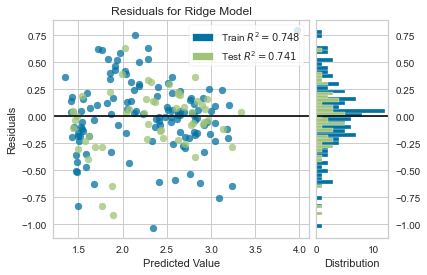

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X=np.array(df_wine['Flavanoids']).reshape(-1,1)
y = np.array(df_wine['Total phenols'])

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

### Plot the residuals (e.g., using ResidualsPlot from yellowbrick) of individual attribute

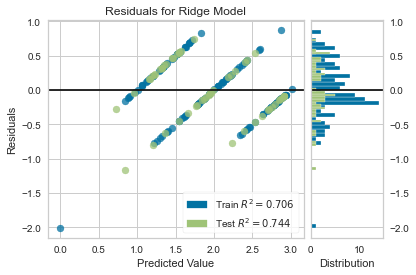

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X=np.array(df_wine['Flavanoids']).reshape(-1,1)
y = np.array(df_wine['Target'])

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

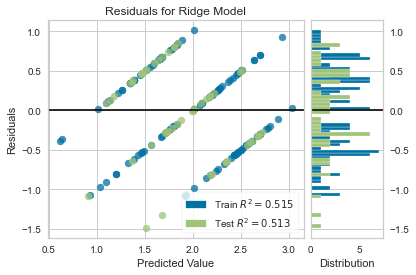

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
# Load a regression dataset
X=np.array(df_wine['Total phenols']).reshape(-1,1)
y = np.array(df_wine['Target']).reshape(-1,1)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Select 2 attributes that don’t look like they have a linear relationship and perform the above on them as well

<AxesSubplot:xlabel='OD280/OD315 of diluted wines', ylabel='Ash'>

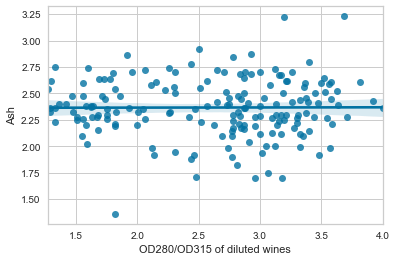

In [49]:
sns.set_style('whitegrid') 
sns.regplot(x ='OD280/OD315 of diluted wines', y ='Ash', data = df_wine)

### R2 score and y intercept using combined attributes

In [50]:
# linear regression model for Falvanoids
from sklearn.linear_model import LinearRegression
X = np.array(df_wine['OD280/OD315 of diluted wines']).reshape(-1,1)
y = np.array(df_wine['Ash']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print("R2 score = ",reg.score(X,y))
print("y intercept =",reg.intercept_)



R2 score =  1.5297725043161847e-05
y intercept = [2.36256976]


### R2 score and y intercept for individual attributes

In [51]:
# linear regression model for Falvanoids
from sklearn.linear_model import LinearRegression
X = np.array(df_wine['OD280/OD315 of diluted wines']).reshape(-1,1)
y = np.array(df_wine['Target']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print("R2 for OD280/OD315 of diluted wines = ",reg.score(X,y))
print("y intercept of OD280/OD315 of diluted wines =",reg.intercept_)
X = np.array(df_wine['Ash']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
print("R2 for Ash= ",reg.score(X,y))
print("y intercept for Ash=",reg.intercept_)

R2 for OD280/OD315 of diluted wines =  0.621305884482723
y intercept of OD280/OD315 of diluted wines = [4.18540578]
R2 for Ash=  0.0024644493936457623
y intercept for Ash= [2.27009318]


### Residual plot using combined attributes

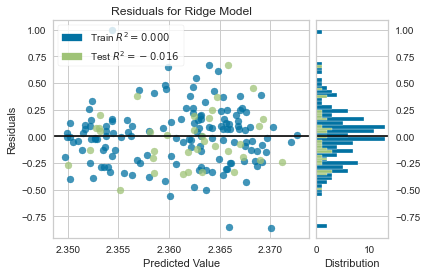

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
# Load a regression dataset
X=np.array(df_wine['OD280/OD315 of diluted wines']).reshape(-1,1)
y = np.array(df_wine['Ash']).reshape(-1,1)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Residual plot of individual attributes

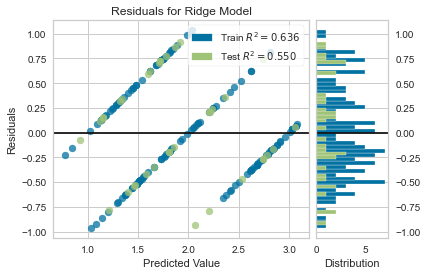

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [53]:
# Load a regression dataset
X=np.array(df_wine['OD280/OD315 of diluted wines']).reshape(-1,1)
y = np.array(df_wine['Target']).reshape(-1,1)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

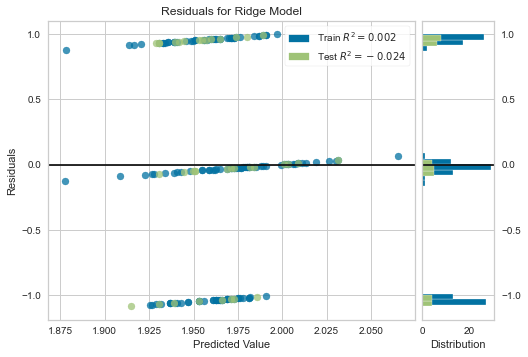

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [191]:
X=np.array(df_wine['Ash']).reshape(-1,1)
y = np.array(df_wine['Target']).reshape(-1,1)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 